# Version 2:
- Incorporating the validation dataset

# VGG-16 and Unet using one layer 

In [1]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\2nd_dataset_image\Cropped_1Channel_Mask")
#os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import PIL # pillow - image processing
import tensorflow as tf
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from keras_segmentation.models.unet import vgg_unet

Using TensorFlow backend.


# GPU

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# Changing File names

## Test

In [5]:
# direc = "Cropped_same_name\\test\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\test\images\*.png')
# reading_masks = glob.glob(r'Cropped\test\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [6]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][26:])
# print(name_images[0:1])
# print(len(name_images))

In [7]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\test\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\test\\Masks\\" + name_images[i])

In [8]:
# name_images = reading_images[0][26:]
# name_images

## train

In [9]:
# direc = "Cropped_same_name\\train\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\train\images\*.png')
# reading_masks = glob.glob(r'Cropped\train\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [10]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][27:])
# print(name_images[0:1])
# print(len(name_images))

In [11]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\train\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\train\\Masks\\" + name_images[i])

### Validation

In [12]:
# direc = "Cropped_same_name\\val\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\val\images\*.png')
# reading_masks = glob.glob(r'Cropped\val\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [13]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][25:])
# print(name_images[0:1])
# print(len(name_images))

In [14]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\val\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\val\\Masks\\" + name_images[i])

# Cropping Images

## Test

In [15]:
# reading_images = glob.glob(r'Cropped_same_name\test\Images\*.png')
# reading_masks = glob.glob(r'Cropped_same_name\test\Masks\*.png')

# print(reading_images[5])
# print(reading_masks[0:1])

In [16]:
# for i in reading_images:
#     im_image = Image.open(i)
#     # im_image.show()
#     cropped_image =  im_image.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
# for i in reading_masks:
#     im_mask = Image.open(i)
#     # im_image.show()
#     cropped_mask =  im_mask.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

## Train

In [17]:
# reading_images = glob.glob(r'Cropped_same_name\train\Images\*.png')
# reading_masks = glob.glob(r'Cropped_same_name\train\Masks\*.png')

# print(reading_images[5])
# print(reading_masks[0:1])

In [18]:
# for i in reading_images:
#     im_image = Image.open(i)
#     # im_image.show()
#     cropped_image =  im_image.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
# for i in reading_masks:
#     im_mask = Image.open(i)
#     # im_image.show()
#     cropped_mask =  im_mask.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

## Validation

In [19]:
# reading_images = glob.glob(r'Cropped_same_name\val\Images\*.png')
# reading_masks = glob.glob(r'Cropped_same_name\val\Masks\*.png')

# print(reading_images[5])
# print(reading_masks[0:1])

In [20]:
# for i in reading_images:
#     im_image = Image.open(i)
#     # im_image.show()
#     cropped_image =  im_image.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
# for i in reading_masks:
#     im_mask = Image.open(i)
#     # im_image.show()
#     cropped_mask =  im_mask.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

# Reading an image

In [21]:
reading_images = glob.glob(r'Cropped_same_name_cropped\train\Images\*.png')
reading_images[0]

'Cropped_same_name_cropped\\train\\Images\\Batch_0_Image_0_Tile_0.png'

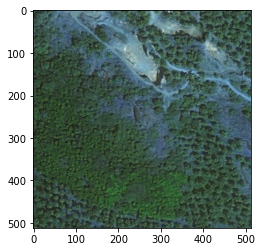

In [22]:
img = PIL.Image.open(reading_images[0], 'r')
plt.imshow(np.asarray(img))

In [23]:
image_array =  np.asarray(img)
image_array.shape

(512, 512, 3)

In [24]:
reading_mask = glob.glob(r'Cropped_same_name_cropped\train\Masks\*.png')
reading_mask[0]

'Cropped_same_name_cropped\\train\\Masks\\Batch_0_Image_0_Tile_0.png'

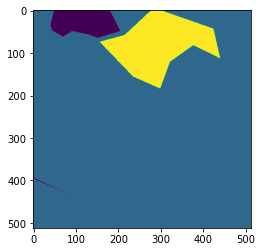

In [25]:
img = PIL.Image.open(reading_mask[0], 'r')
plt.imshow(np.asarray(img))

In [26]:
image_array =  np.asarray(img)
image_array.shape

(512, 512)

# Building the model

In [27]:
model = vgg_unet(n_classes=7 , input_height=512, input_width=512)

In [28]:
callbacks = [
    ModelCheckpoint(filepath='Cropped_same_name_cropped\Model_Save\VGG_UNET_callbacks\model_weights_best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=True),
    EarlyStopping()
    ]

In [29]:
callbacks

In [30]:
from datetime import datetime
start = datetime.now()
model_vgg_unet = model.train(
    train_images =  "Cropped_same_name_cropped/train/Images/",
    train_annotations = "Cropped_same_name_cropped/train/Masks/",
    checkpoints_path = "Cropped_same_name_cropped/Model_Save/VGG_UNET_callbacks_2/Checkpoints/vgg_unet_config.json" , 
    validate= True,
    val_images =  "Cropped_same_name_cropped/val/Images/",
    val_annotations = "Cropped_same_name_cropped/val/Masks/",
    epochs=50,
    #callbacks = callbacks
)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))

Verifying training dataset


100%|██████████| 8221/8221 [01:09<00:00, 118.25it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 2570/2570 [00:44<00:00, 57.19it/s]


Dataset verified! 
Epoch 1/50
512/512 [==============================] - 240s 468ms/step - loss: 1.3660 - accuracy: 0.5598 - val_loss: 0.8980 - val_accuracy: 0.5725
saved  Cropped_same_name_cropped/Model_Save/VGG_UNET_callbacks_2/Checkpoints/vgg_unet_config.json.0
Epoch 2/50
512/512 [==============================] - 224s 438ms/step - loss: 1.2451 - accuracy: 0.5774 - val_loss: 0.6560 - val_accuracy: 0.6177
saved  Cropped_same_name_cropped/Model_Save/VGG_UNET_callbacks_2/Checkpoints/vgg_unet_config.json.1
Epoch 3/50
512/512 [==============================] - 224s 437ms/step - loss: 1.1759 - accuracy: 0.6051 - val_loss: 1.9349 - val_accuracy: 0.5521
saved  Cropped_same_name_cropped/Model_Save/VGG_UNET_callbacks_2/Checkpoints/vgg_unet_config.json.2
Epoch 4/50
512/512 [==============================] - 223s 436ms/step - loss: 1.2048 - accuracy: 0.5858 - val_loss: 1.6626 - val_accuracy: 0.6494
saved  Cropped_same_name_cropped/Model_Save/VGG_UNET_callbacks_2/Checkpoints/vgg_unet_config.json

# Predicting test image

In [31]:
reading_image = glob.glob(r'Cropped_same_name_cropped\test\Images\*.png')
reading_image[4]

'Cropped_same_name_cropped\\test\\Images\\Batch_0_Image_11_Tile_13.png'

In [32]:
reading_mask = glob.glob(r'Cropped_same_name_cropped\test\Masks\*.png')
reading_mask[4]

'Cropped_same_name_cropped\\test\\Masks\\Batch_0_Image_11_Tile_13.png'

In [33]:
out = model.predict_segmentation(
    inp= reading_image[4],
    out_fname='Cropped_same_name_cropped/VGG_UNET_predictions/out.png'
)

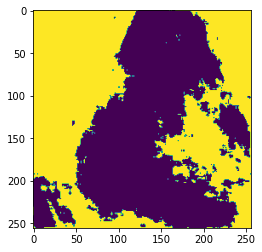

In [34]:
plt.imshow(out)

In [35]:
img = PIL.Image.open(reading_image[4], 'r')
mask = PIL.Image.open(reading_mask[4], 'r')

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# # plt.figure(figsize = (15, 8))
# # plt.subplot(1, 3, ax1, ax2, ax3, xticks = [], yticks = [])
# ax1 = plt.imshow(np.asarray(img))
# ax2 = plt.imshow(np.asarray(mask))
# ax3 = plt.imshow(out)


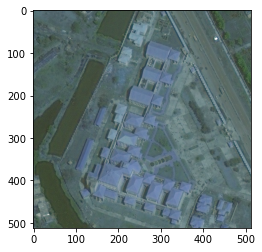

In [36]:
plt.imshow(np.asarray(img))

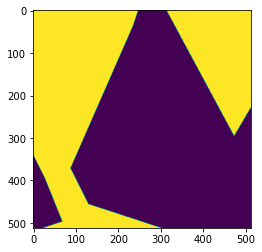

In [37]:
plt.imshow(np.asarray(mask))

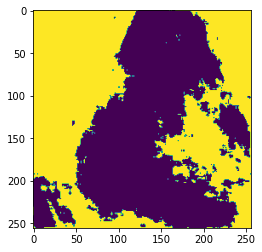

In [38]:
plt.imshow(out)

In [39]:
vgg_unet.save('Cropped_same_name_cropped\Model_Save\VGG_UNET_callbacks_2\vgg_unet.h5')

AttributeError: 'NoneType' object has no attribute 'save'

In [ ]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

In [69]:
reading_mask = glob.glob(r'Cropped_same_name_cropped\test\Images\*.png')
reading_mask[6]

'Cropped_same_name_cropped\\test\\Images\\Batch_0_Image_12_Tile_1.png'